In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
typingList = {}
f = open("typing-challenge/task2/task2-keystrokes-12users-raw-data.txt","r")
for line in f:
    if line == "" or line.startswith(" "): 
        continue
    elif line.startswith("TYPING"):
        currPattern = line.replace("\n","")
        typingList[currPattern] = []
    else:
        typingList[currPattern].append(line.replace("\n","").split())
f.close()

In [4]:
keyLoc = [['`','1','2','3','4','5','6','7','8','9','0','-','=',8],
         ['','Q','W','E','R','T','Y','U','I','O','P','[',']','\\'],
         ['','A','S','D','F','G','H','J','K','L',';','',13],
         ['',16,'Z','X','C','V','B','N','M',',','.','/'],
         ['','','','','',' ']]

keyLocOrd = [[(ord(j) if isinstance(j, str) and len(j)==1 else j) for j in i] for i in keyLoc]
keyLocOrd

[[96, 49, 50, 51, 52, 53, 54, 55, 56, 57, 48, 45, 61, 8],
 ['', 81, 87, 69, 82, 84, 89, 85, 73, 79, 80, 91, 93, 92],
 ['', 65, 83, 68, 70, 71, 72, 74, 75, 76, 59, '', 13],
 ['', 16, 90, 88, 67, 86, 66, 78, 77, 44, 46, 47],
 ['', '', '', '', '', 32]]

In [5]:
keyDict = {}
keyDictOrd = {}

for i, lst in enumerate(keyLoc):
    for j, val in enumerate(lst):
        keyDict[val] = (i,j)


for i, lst in enumerate(keyLocOrd):
    for j, val in enumerate(lst):
        keyDictOrd[val] = (i,j)


In [ ]:
dfs = []
res = {}
for i, key in enumerate(typingList):
    df = pd.DataFrame(typingList[key][:-1])
    df.columns = ["event","keyCode","which","charCode","shiftKey","timestamp"]
    df["timestamp_flt"] = df.timestamp.astype("float")
    df["timeDiff"] = df["timestamp_flt"] - df["timestamp_flt"][0]
    
    df["keyLoc"] = df.which.astype(int).map(keyDictOrd)
    #df["keyLoc"].fillna((-1,-1), inplace=True)
    
    df = df.loc[df.event != "keypress"]
    
    starts = df.loc[df.event == "keydown"]
    ends = df.loc[df.event == "keyup"]

    
    for index, row in starts.iterrows():
        endsRestr = ends.loc[(ends.index > index) & (ends.which == row.which)]
        if endsRestr.shape[0] > 0:
            row2 = endsRestr.iloc[0]
            res[(i,index)] = {"id":i+1,"keycode":row.which, "loc":row.keyLoc,"timeFrom":row.timeDiff,"timeTo":row2.timeDiff}
    dfs.append(df)

    
trialDF = pd.DataFrame(res).T       
trialDF

In [6]:
trialDF.to_csv("processed_data_task2.csv")

In [ ]:
trialDF = pd.read_csv("processed_data_task2.csv", index_col=(0,1))

In [ ]:
trialDF.timeTo.quantile(0.99)

In [ ]:
trialDF["loc"].dtype

In [ ]:
trialDF["loc"].fillna("-1", inplace=True)

In [ ]:
from ast import literal_eval
trialDF["loc"] = trialDF["loc"].apply(literal_eval)

In [ ]:
trialDF.loc[trialDF.id==1]

In [7]:
h = np.linspace(0,1,5)
w = np.linspace(0,1,14)
hw = np.linspace(1,0,30)
alpha = 0.8
splits = 15

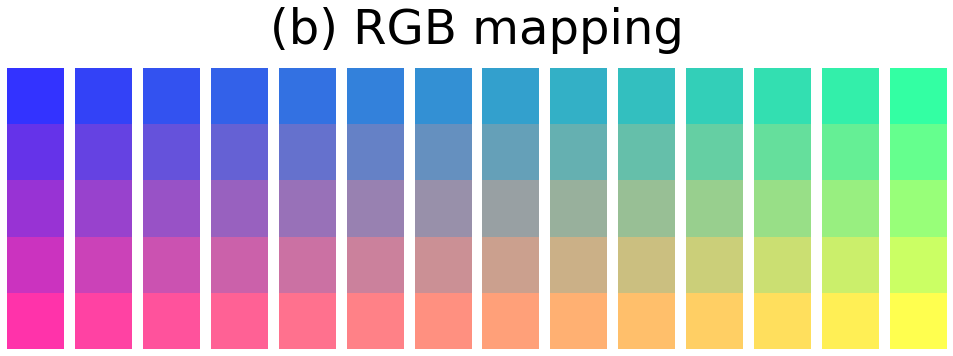

In [16]:
fig, ax = plt.subplots(5,14, figsize=(13.5,5))


for i in range(5):
    for j in range(14):
        ax[i,j].imshow([[(h[i],w[j],hw[(i*3+j)],alpha)]])
        ax[i,j].get_xaxis().set_ticks([])
        ax[i,j].get_yaxis().set_ticks([])
        ax[i,j].set_xticklabels("")
        ax[i,j].set_yticklabels("")
        ax[i,j].spines["left"].set_visible(False)
        ax[i,j].spines["right"].set_visible(False)
        ax[i,j].spines["top"].set_visible(False)
        ax[i,j].spines["bottom"].set_visible(False)


fig.suptitle("(b) RGB mapping", fontsize=48)
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig("k1.png", dpi=300)

In [15]:
trialDF.id.max()

548

In [16]:
import math
import matplotlib.patches as patches
for k in range(278,trialDF.id.max()+1):
#for k in range(0,280):
    fig, ax = plt.subplots(splits, 1, figsize=(8,8))
    plt.subplots_adjust(wspace=0, hspace=0)
    
    lmin = trialDF.timeFrom.min()
    lmax = trialDF.timeTo.quantile(0.95)
    step = (lmax - lmin) / splits
    init = lmin
    for i in range(splits):  
        ax[i].set_xlim(init,init+step)
        init += step 
        ax[i].set_xticklabels("")
        ax[i].set_yticklabels("")
    
    last_end = 0
    for index, row in trialDF.loc[trialDF.id==k].iterrows():
        #print(type(row["loc"]))
        if isinstance(row["loc"],int):
            color = (0,0,0,alpha)
        else:
            color = (h[row["loc"][0]],w[row["loc"][1]],(hw[row["loc"][0]*3+row["loc"][1]]),alpha)

        if last_end >= row.timeFrom:
            height = 0.2
        else:
            height = 0.0
        if last_end < row.timeTo:
            last_end = row.timeTo
        for i in range(splits):  
            patch = patches.Rectangle((row.timeFrom,height), (row.timeTo - row.timeFrom), 0.8, linewidth=0, edgecolor='none', facecolor=color)
            ax[i].add_patch(patch)
    plt.savefig("task2_visualizations2/"+str(k)+".png")
    plt.close()
    print(k)

278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
